# **Mileage Prediction - Regression Analysis**

-------------

## **Objective**

to predict the mileage of a vehicle using it's weight, displacement, horsepower and acceleration

## **Data Source**

https://github.com/YBIFoundation/Dataset/raw/refs/heads/main/MPG.csv

## **Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [4]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/refs/heads/main/MPG.csv')

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

## **Describe Data**

In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## **Data Visualization**

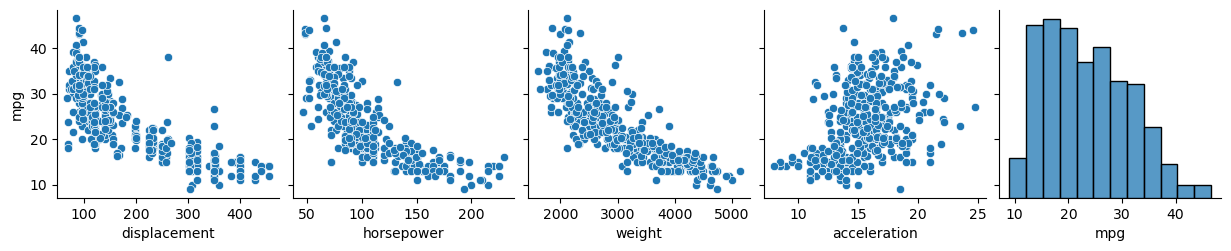

In [15]:
sns.pairplot(df, x_vars= ['displacement','horsepower','weight','acceleration','mpg'], y_vars=['mpg']);

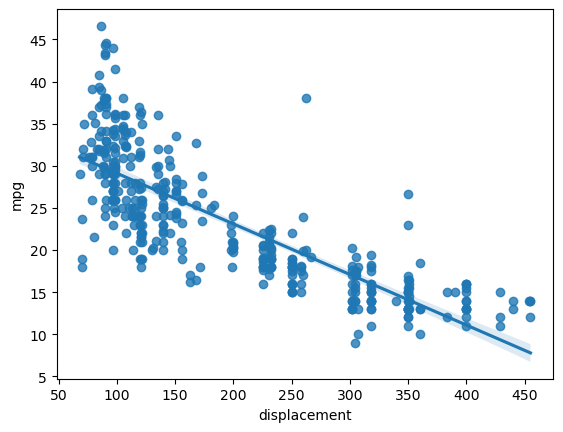

In [17]:
sns.regplot(x = 'displacement', y = 'mpg', data= df);

## **Data Preprocessing**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [12]:
df = df.dropna()

## **Define Target Variable (y) and Feature Variables (X)**

In [18]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [19]:
y = df['mpg']
x = df[['displacement', 'horsepower', 'weight',
       'acceleration']]

## **Train Test Split**

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state= 2529)

## **Modeling**

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## **Model Evaluation**

In [22]:
model.fit(x_train,y_train)

LinearRegression()

## **Prediction**

In [23]:
y_pred = model.predict(x_test)
x_test

,displacement,horsepower,weight,acceleration
262,305.0,145.0,3425,13.2
290,351.0,142.0,4054,14.3
65,351.0,153.0,4129,13.0
359,141.0,80.0,3230,20.4
79,96.0,69.0,2189,18.0
...,...,...,...,...
244,90.0,48.0,1985,21.5
165,262.0,110.0,3221,13.5
131,71.0,65.0,1836,21.0
113,155.0,107.0,2472,14.0


In [24]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.14486145216628085

accuracy is (100 - 14) = 86%

## **Explaination**

Through this linear regression model we can predict the mileage of a vehicle with four inputs - weight, displacement, horsepower and acceleration with 86% accuracy